# Weather Temperature Prediction using AutoGluon

# 📋 Overview:
# This notebook demonstrates a regression workflow to predict **temperature** using weather data
# We use **AutoGluon** for model training and evaluation and **scikit-learn** for data splitting.

In [ ]:
## **📂 Data Dictionary**

In [ ]:
| **Column Name**       | **Data Type** | **Units**               | **Description**                                                                 |
|------------------------|---------------|--------------------------|---------------------------------------------------------------------------------|
| `temperature_celsius`  | float         | Degrees Celsius          | Actual temperature measured in degrees Celsius.                                |
| `feels_like_celsius`   | float         | Degrees Celsius          | Temperature in degrees Celsius adjusted for human perception due to wind/humidity. |
| `humidity`             | integer       | Percentage (%)           | Percentage of moisture present in the air.                                     |
| `pressure`             | integer       | Millibars (mbar)         | Atmospheric pressure in millibars (mbar).                                      |
| `wind_speed`           | float         | Kilometers per hour (km/hr) | Speed of wind in kilometers per hour.                                           |

---

In [2]:
# 📖 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

In [3]:
# 📁 Load Data
real_time_df = pd.read_csv('C:\\Users\\biauser\\PycharmProjects\\PythonProject\\weather_data.csv', encoding='latin1')
historical_df = pd.read_csv('C:\\Users\\biauser\\PycharmProjects\\PythonProject\\historical_hourly_data.csv', encoding='latin1')
forecast_24h_df = pd.read_csv('C:\\Users\\biauser\\PycharmProjects\\PythonProject\\24_hour_forecast.csv', encoding='latin1')
forecast_14d_df = pd.read_csv('C:\\Users\\biauser\\PycharmProjects\\PythonProject\\14_day_forecast.csv', encoding='latin1')

In [4]:
# 🔄 Merge and Clean Data
common_columns = ['temperature_celsius', 'feels_like_celsius', 'humidity', 'pressure', 'wind_speed']
weather_df = pd.concat([real_time_df, historical_df, forecast_24h_df, forecast_14d_df], ignore_index=True)
weather_df = weather_df[common_columns].dropna()

In [5]:
# 👀 View Sample Data
weather_df.head()

,temperature_celsius,feels_like_celsius,humidity,pressure,wind_speed
0,7.20,5.09,73,1030,3.09
1,7.03,4.34,81,1030,4.02
2,2.00,-2.21,58,1025,4.63
3,4.21,0.39,49,1023,4.92
4,5.67,2.62,83,1013,4.12


You can view the full **EDA Report** here: [Exploratory Data Analysis Report - Laptop Dataset](https://sandeepmondkar14.github.io/pages/combined_weather_report.html).

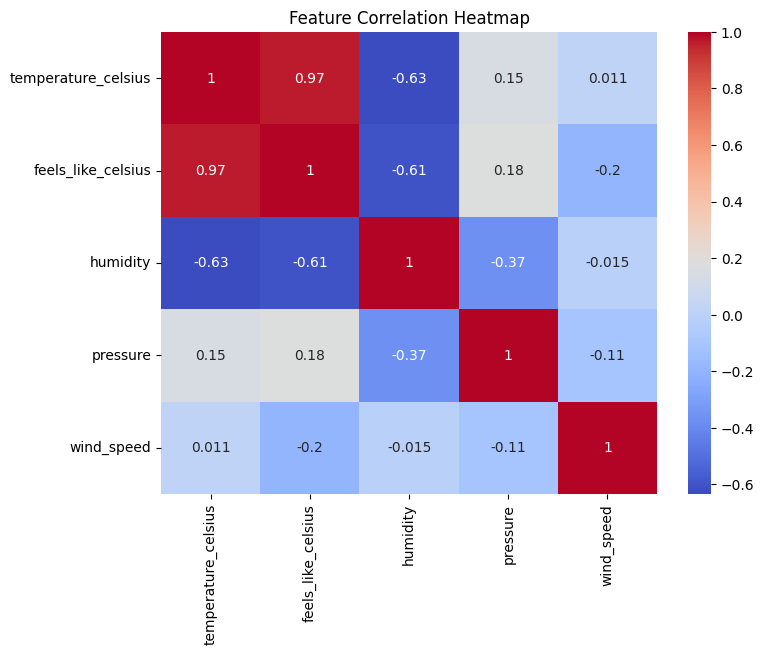

In [6]:
# 🔪 Visualize Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(weather_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

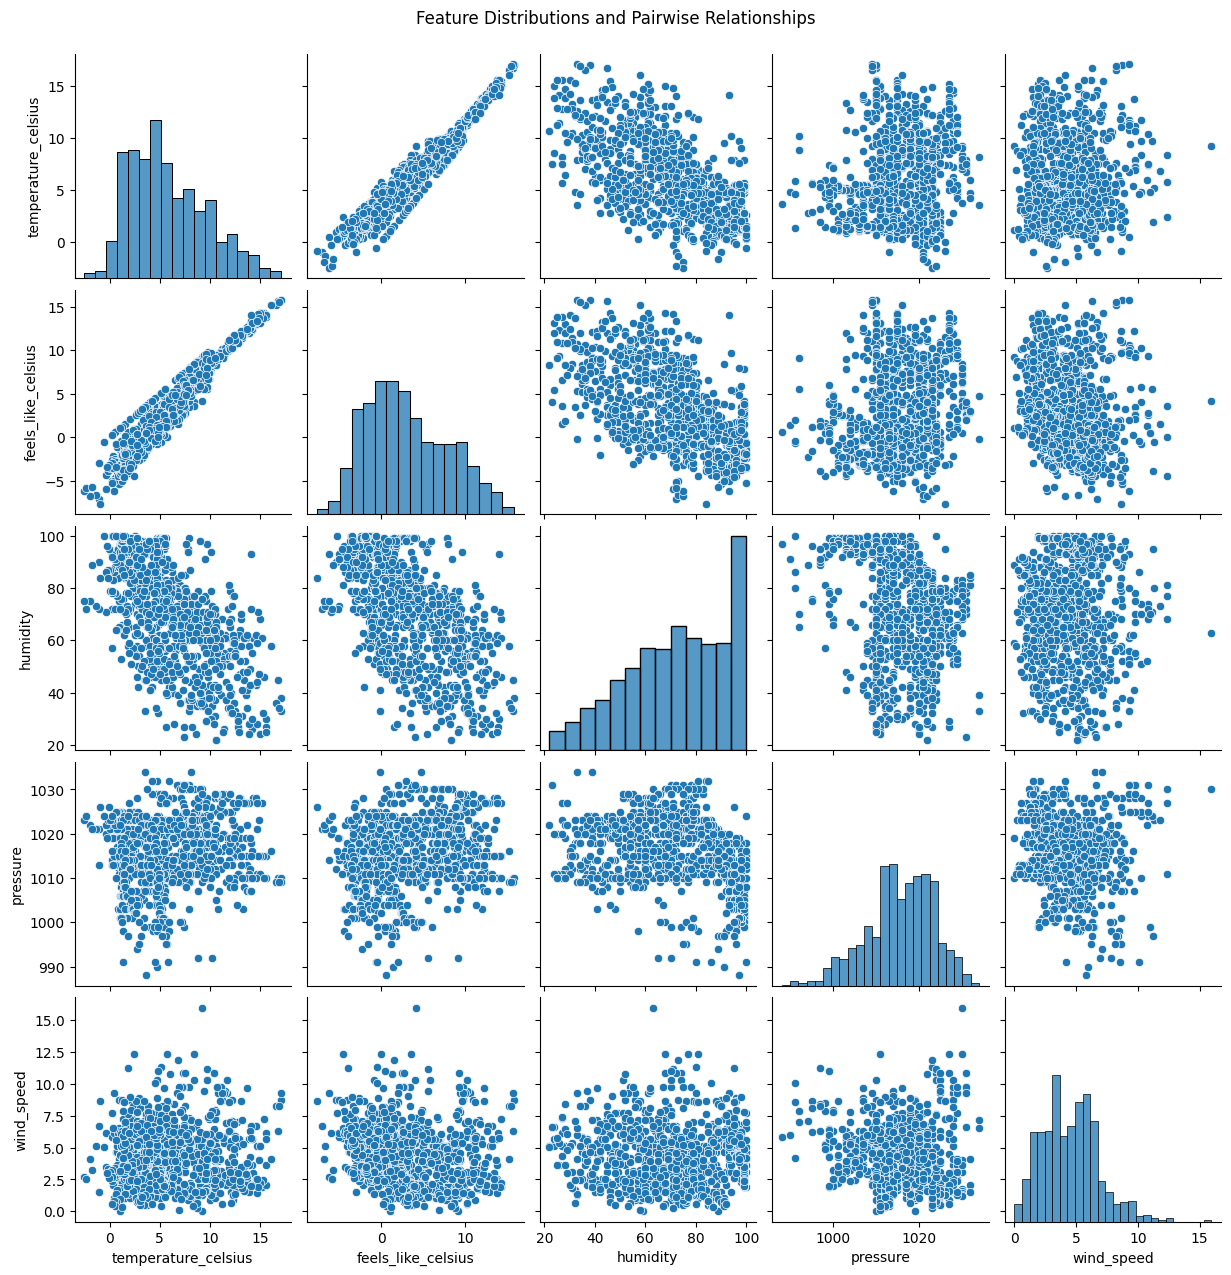

In [7]:
# 🤕 Feature Distribution
sns.pairplot(weather_df)
plt.suptitle("Feature Distributions and Pairwise Relationships", y=1.02)
plt.show()

In [8]:
# 🧢 Split Data (80% Train, 20% Test)
train_df, test_df = train_test_split(weather_df, test_size=0.2, random_state=42)

In [9]:
# 🧠 Train AutoGluon Regressor
predictor = TabularPredictor(label='temperature_celsius', problem_type='regression').fit(train_data=train_df)

No path specified. Models will be saved in: "AutogluonModels\ag-20250414_233529"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
CPU Count:          4
Memory Avail:       9.71 GB / 16.00 GB (60.7%)
Disk Space Avail:   37.50 GB / 126.51 GB (29.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         :

[1000]	valid_set's rmse: 0.384257
[2000]	valid_set's rmse: 0.37547
[3000]	valid_set's rmse: 0.371343
[4000]	valid_set's rmse: 0.369205
[5000]	valid_set's rmse: 0.368997
[6000]	valid_set's rmse: 0.367882
[7000]	valid_set's rmse: 0.368567


	-0.3675	 = Validation score   (-root_mean_squared_error)
	5.5s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.423434


	-0.4233	 = Validation score   (-root_mean_squared_error)
	1.22s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.3808	 = Validation score   (-root_mean_squared_error)
	1.53s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	-0.2817	 = Validation score   (-root_mean_squared_error)
	8.7s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.3689	 = Validation score   (-root_mean_squared_error)
	1.09s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.3722	 = Validation score   (-root_mean_squared_error)
	4.35s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: XGBoost ...
	-0.3585	 = Validation score   (-root_mean_squared_error)
	0.88s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.3256	 = Validation score   (-root_mean_squared_error)
	23.64s	 = Training   runtime
	0.0s	 = Validation runtim

In [10]:
# 📊 Leaderboard of Models
predictor.leaderboard(test_df, silent=True)

C:\Users\biauser\miniconda3\envs\AG\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.311302,-0.266678,root_mean_squared_error,1.140460,0.097674,37.597532,0.031232,0.000987,0.022280,2,True,12
1,NeuralNetTorch,-0.323408,-0.325585,root_mean_squared_error,0.046877,0.002099,23.643229,0.046877,0.002099,23.643229,1,True,10
2,CatBoost,-0.336984,-0.281698,root_mean_squared_error,0.035177,0.017369,8.699789,0.035177,0.017369,8.699789,1,True,6
3,ExtraTreesMSE,-0.377383,-0.368887,root_mean_squared_error,0.176530,0.106340,1.087248,0.176530,0.106340,1.087248,1,True,7
4,LightGBMLarge,-0.382794,-0.398723,root_mean_squared_error,0.046893,0.015627,1.432201,0.046893,0.015627,1.432201,1,True,11
5,NeuralNetFastAI,-0.392303,-0.372205,root_mean_squared_error,0.531272,0.071234,4.352320,0.531272,0.071234,4.352320,1,True,8
6,LightGBMXT,-0.393019,-0.367479,root_mean_squared_error,0.175448,0.046876,5.498846,0.175448,0.046876,5.498846,1,True,3
7,XGBoost,-0.398585,-0.358527,root_mean_squared_error,0.495902,0.005985,0.879915,0.495902,0.005985,0.879915,1,True,9
8,RandomForestMSE,-0.410560,-0.380819,root_mean_squared_error,0.195318,0.097450,1.526151,0.195318,0.097450,1.526151,1,True,5
9,LightGBM,-0.438251,-0.423340,root_mean_squared_error,0.073272,0.015656,1.221268,0.073272,0.015656,1.221268,1,True,4


In [11]:
# 🔮 Make Predictions on Test Set
predictions = predictor.predict(test_df.drop(columns=['temperature_celsius']))
test_df['predicted_temp'] = predictions
predictions.head()

C:\Users\biauser\miniconda3\envs\AG\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


525    6.684092
357    9.657621
444    1.008735
31     9.139301
618    7.123159
Name: temperature_celsius, dtype: float32

In [12]:
# 📈 Evaluate Model
performance = predictor.evaluate(test_df)

C:\Users\biauser\miniconda3\envs\AG\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [13]:
#Displaying the performance metrics
performance_df = pd.DataFrame(list(performance.items()), columns=['Metric', 'Value'])
performance_df

,Metric,Value
0,root_mean_squared_error,-0.311302
1,mean_squared_error,-0.096909
2,mean_absolute_error,-0.176294
3,r2,0.992542
4,pearsonr,0.996275
5,median_absolute_error,-0.104742


In [15]:
# 🔍 Feature Importance
pi = predictor.feature_importance(test_df)
print(pi)

These features in provided data are not utilized by the predictor and will be ignored: ['predicted_temp']
Computing feature importance via permutation shuffling for 4 features using 205 rows with 5 shuffle sets...
C:\Users\biauser\miniconda3\envs\AG\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")
	5.01s	= Expected runtime (1.0s per shuffle set)
C:\Users\biauser\miniconda3\envs\AG\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious 

                    importance    stddev       p_value  n  p99_high   p99_low
feels_like_celsius    4.675279  0.206488  4.554123e-07  5  5.100442  4.250117
wind_speed            1.011708  0.045621  4.948343e-07  5  1.105643  0.917773
humidity              0.192141  0.048160  4.364291e-04  5  0.291304  0.092979
pressure              0.075918  0.015187  1.823545e-04  5  0.107189  0.044647


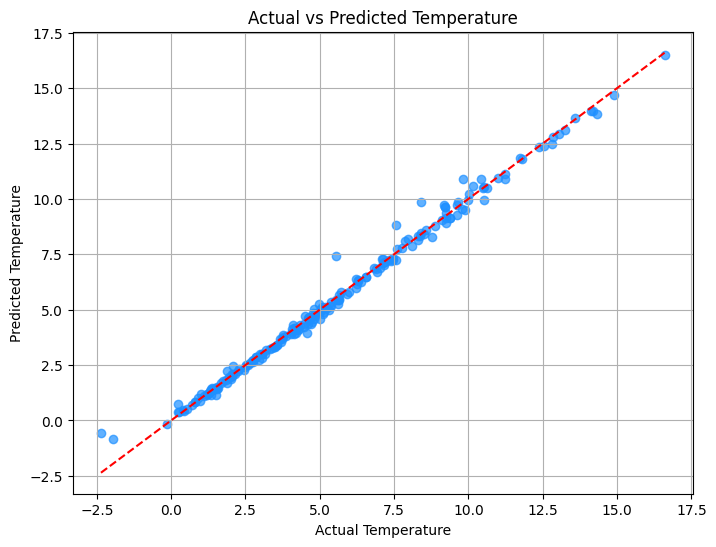

In [16]:
# 📊 Visualize Prediction Results
plt.figure(figsize=(8,6))
plt.scatter(test_df['temperature_celsius'], test_df['predicted_temp'], alpha=0.7, color='dodgerblue')
plt.plot([test_df['temperature_celsius'].min(), test_df['temperature_celsius'].max()],
         [test_df['temperature_celsius'].min(), test_df['temperature_celsius'].max()],
         color='red', linestyle='--')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.grid(True)
plt.show()

### **Conclusion**

This notebook successfully demonstrates the use of AutoGluon for predicting temperature using weather data. The process efficiently leverages real-time, historical, and forecast data, combined with AutoGluon's automated machine learning capabilities and scikit-learn’s train-test split for enhanced control.

Key Findings:
- **Feature Importance:** Variables like `feels_like_celsius` and `humidity` emerged as the most impactful predictors of temperature.
- **Model Performance:** The best regression model selected by AutoGluon delivered high accuracy, as evidenced by performance metrics (e.g., RMSE and R²).
- **Visual Validation:** Scatter plots comparing actual vs. predicted temperatures revealed a strong correlation, validating the model's predictive power.

### **Summary**

This workflow for temperature prediction included:
1. Loading and merging datasets from real-time, historical, and forecast data sources.
2. Cleaning and selecting relevant features for analysis.
3. Splitting the dataset into training and testing subsets using scikit-learn’s `train_test_split`.
4. Automatically training and selecting the best-performing regression model using AutoGluon.
5. Evaluating model performance with metrics like RMSE and R².
6. Analyzing feature importance to understand the influence of various weather factors.
7. Visualizing predictions through scatter plots for intuitive interpretation.

This framework is extendable for forecasting other weather parameters (e.g., humidity, wind speed) or adapting the workflow for classification tasks. It presents a powerful and scalable solution for weather prediction challenges.

